# Applied Social Network Analysis in Python

## Chapter 4-1. Preferential Attachment Model
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/preferential-attachment-model-abipd)**

<hr>
Sometimes we're interested in seeing how the degrees of all the nodes are distributed across the whole network, instead of interested in that particular degree of a specific node.

### Degree Distribution.

The degree of a node in an undirected graph is the number of neighbors it has.

we look at the network's **degree distribution** which is the probability distribution of the degrees over the entire network<br>
The degree distribution, $P(k)$, of this network has the following values : 
$$
P(1) = {1 \over 9}, P(2) = {4 \over 9}, P(3) = {1 \over 3}, P(4) = {1 \over 9}, 
$$
Also we can get plot of the degree distribution of this network using `networkx`.  <br>
This allows us to see how these degrees are distributed over the network.

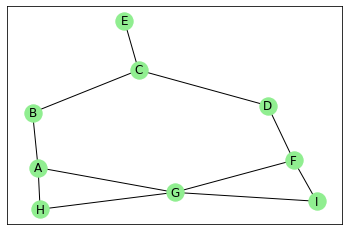

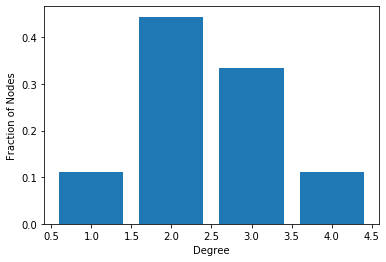

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Creating Undirected Graphs for example.
G = nx.Graph()

# add edges into graph.
un_edge_list = [
    ('A','B'),('A','G'),('A','H'),('B','C'),('C','D'),('C','E'),
    ('D','F'),('F','G'),('F','I'),('G','H'),('G','I')
]

for n1, n2, in un_edge_list:
    G.add_edge(n1, n2)
    
pos = nx.spring_layout(G, seed=201703)

nx.draw_networkx(G, pos, node_color='lightgreen') # Undirected

plt.show()

# construct a list of sorted degrees, which can contain degrees of each node
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
#  construct a histogram that tells us how many nodes of a particular degree we have
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

<hr>

### In-Degree Distribution

The **in-degree** of a node in a directed graph is the number of **in-links** it has.

The in-degree distribution, $P_{in}(k)$, of this network has the following values:
$$
P_{in}(0) = {2 \over 9}, P_{in}(1) = {4 \over 9}, P_{in}(2) = {1 \over 3}, P_{in}(3) = {1 \over 9}, 
$$

and we can visualize this in-degree distribution as we did same as undirected graph.

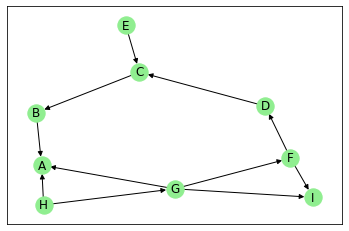

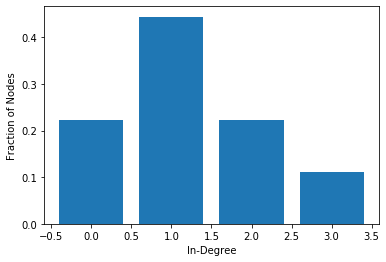

In [2]:
# Creating Undirected Graphs for example.
G = nx.DiGraph()

# add edges into graph.
di_edge_list = [
    ('B','A'),('H','A'),('G','A'),('C','B'),('D','C'),('E','C'),
    ('F','D'),('G','F'),('F','I'),('H','G'),('G','I')
]

for n1, n2, in di_edge_list:
    G.add_edge(n1, n2)

nx.draw_networkx(G, pos, node_color='lightgreen') # Undirected

plt.show()

# construct a list of sorted "in-degrees", which can contain in-degrees of each node
degrees = dict(G.in_degree())
degree_values = sorted(set(degrees.values()))
#  construct a histogram that tells us how many nodes of a particular in-degree we have
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

plt.bar(degree_values, histogram)
plt.xlabel('In-Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

<hr>

### Degree Distributions in Real Networks

* Figure A - **Actor** : network of 225,000 actors connected when they appear in a movie together.
* Figure B - **The Web** : network of 325,000 documents on the WWW connected by URLs.
* Figure C - **US Power Grid** : Network of 4,941 generators connected by transmission lines.

<img src="./figures/Degre_Distributions_in_Real_Networks.png" width="500" height="400">

Degree distribution looks like a straight line when on a log-log scale.<br>
**Power law** : $P(k) = Ck^{-\alpha}$, where $\alpha$ and $C$ are constants. $\alpha$-values - A:2.3, B:2.1, C:4

the thing to know about power law degree distributions is that they tend to have most of the nodes with very, very small degree, but you have a few nodes that accumulate a very, very large degree.<br>
Networks with power law distribution have many nodes with small degree and a few nodes with very large degree.

One of the things we try to ask when we see something like this is, 
**What could explain power law degree distribution we observe in many networks?**<br>
**Can we find a set of basic assumption that explain this phenomenon?**

The way we try to answer this question is by coming up with models that generate networks that make a few assumptions about how these networks get formed, and then they give rise to whatever properties we observe. 

the question would be, can we come up with **a model that generates a network that has a power law-like degree distribution**? <br>
One of the models that achieves this property is called a Preferential Attachment Model.

<hr>

### Preferential Attachment Model

The preferential attachment model produces networks with deree distributions similar to real networks.

1. Start with two nodess connected by an edge
2. At each time step, add a new node with an edge connecting it to an existing node.
3. Choose the node to connect to at random with probability
4. The probability of connecting to a node $u$ of degree $k_u$ is ${k_u \over \sum_j k_j}$

The thing to notice here is that as node two started to get larger and larger degree, its probability of getting a new edge became larger and larger as well.<br>
There is this sort of rich get richer phenomenon, where as the nodes get larger and larger degree, they also start to become more and more likely to increase their degree.

What we can prove about this particular mechanism is that it gives rise to a power law. It approaches a power law as the number of nodes gets larger, and larger, and larger.<br>
So it matches the kind of degree distribution that we see in these real networks.

**This type of modeling technique allows us to explain or at least have some hypothesis for what kind of mechanism could give and rise to this shape of the degree distribution that we observe.**

### Preferential Attachment Model in Networkx

`barabasi_albert_graph(n,m)` returns a network with n nodes. each new node attactes to m existing nodes according to the "Preferential Attachment Model"

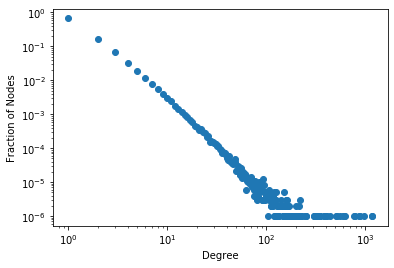

In [3]:
# create one here with a million nodes and an m(1), so every node attaches to a single existing node. 
G = nx.barabasi_albert_graph(1000000, 1)
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

# plot the degree distribution in the same way that we did before but scatter plot.
plt.plot(degree_values, histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')

# setting the scales, the y-scale and x-scales to be logged 
plt.xscale('log')
plt.yscale('log')
plt.show()